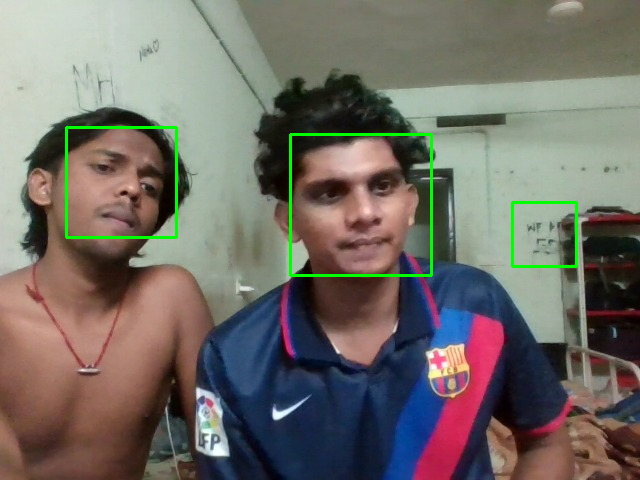

Detected 3 face(s).


In [2]:
# Step 1: Install OpenCV
!pip install opencv-python-headless

# Step 2: Capture image from webcam using JS
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import PIL.Image
import io
import base64

# JavaScript code to access webcam and capture photo
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Take Photo';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            div.appendChild(video);

            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            // Resize output to match video
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for capture
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            const dataUrl = canvas.toDataURL('image/jpeg', quality);
            return dataUrl;
        }
        takePhoto({quality: %f});
    ''' % quality)
    data = eval_js(js.data) # Extract the JavaScript string using .data
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Step 3: Take photo
photo_filename = take_photo()

# Step 4: Load and detect face using OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

image = cv2.imread(photo_filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangles on faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Step 5: Show result
cv2_imshow(image)
print(f"Detected {len(faces)} face(s).")